In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [42]:
dailycheckins = pd.read_csv("datasets/dailycheckins.csv")

In [43]:
checkin = pd.DataFrame(dailycheckins)

In [44]:
print(checkin)

         user                timestamp  hours               project
0         ned  2019-09-27 00:00:00 UTC    8.0                bizdev
1      robert      09/27/2019 12:00 AM    8.0                bizdev
2         ned   26 сентября 2019 00:00    4.0                bizdev
3         ned  2019-09-26 00:00:00 UTC    1.0  cultureandmanagement
4         ned  2019-09-26 00:00:00 UTC    1.5            project-00
...       ...                      ...    ...                   ...
20495  robert  2010-10-04 00:00:00 UTC    2.0               transit
20496  robert  2010-10-04 00:00:00 UTC    2.0  cultureandmanagement
20497  robert     4 октября 2010 00:00    1.5                bizdev
20498  robert  2010-10-04 00:00:00 UTC    1.0               transit
20499  robert  2010-10-04 00:00:00 UTC    6.0                bizdev

[20500 rows x 4 columns]


In [45]:
checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user       20495 non-null  object 
 1   timestamp  20500 non-null  object 
 2   hours      20500 non-null  float64
 3   project    20500 non-null  object 
dtypes: float64(1), object(3)
memory usage: 640.8+ KB


In [46]:
checkin.isnull().sum()

user         5
timestamp    0
hours        0
project      0
dtype: int64

Seeing that there are 5 null values in the 'users' column, we try to output the rows where those null values are.

In [47]:
if checkin['user'].isnull().any(axis=None):
    print(checkin[checkin.isnull().any(axis=1)])

      user                       timestamp  hours     project
15797  NaN  2017-12-27 10:36:14.000121 UTC   4.00  project-40
15798  NaN  2017-12-27 10:36:14.000121 UTC   3.00    learning
17572  NaN  2017-10-12 10:31:44.000227 UTC   2.75  project-47
17573  NaN  2017-10-12 10:31:44.000227 UTC   4.00      bizdev
17574  NaN  2017-10-12 10:31:44.000227 UTC   1.00     transit


There are 5 NaN (null) values in the dataset. Given that there are only 5 nulls in a 20,500-row dataset, dropping the rows where there are nulls is a possible choice.

In [48]:
checkin.dropna(inplace=True)

Rows with nulls have been dropped from the dataset.

In [49]:
if checkin['user'].isnull().any(axis=None):
    print(checkin[checkin.isnull().any(axis=1)])

The next thing that needs to be done is accounting for duplicates. 

In [50]:
checkin[checkin.duplicated(subset=['user','timestamp', 'hours','project'], keep=False)]

,user,timestamp,hours,project
30,jorah,2018-11-26 12:49:17.0405 UTC,0.50,opsandadmin
31,jorah,2018-11-26 12:49:17.0405 UTC,0.50,opsandadmin
169,joffrey,2018-11-22 14:12:32.0431 UTC,2.00,project-25
172,joffrey,2018-11-22 14:12:32.0431 UTC,2.00,project-25
174,jon,2018-11-22 11:36:11.042 UTC,1.75,project-25
...,...,...,...,...
20442,jorah,2017-06-28 11:08:21.134554 UTC,1.00,project-07
20444,bronn,2017-06-28 10:56:20.979982 UTC,3.00,project-63
20446,bronn,2017-06-28 10:56:20.979982 UTC,3.00,project-63
20475,jorah,2017-06-19 09:07:51.085966 UTC,0.50,project-65


In [51]:
checkin.drop_duplicates(inplace=True)

In [52]:
checkin[checkin.duplicated(subset=['user','timestamp', 'hours','project'], keep=False)]

,user,timestamp,hours,project


The rows with duplicates in all columns have been taken care of. Now, it's time to check if there are some erroneous entries on the 'hours' column.

In [53]:
checkin[checkin.duplicated(subset=['user','timestamp','project'], keep=False)]

,user,timestamp,hours,project
7,jaime,2018-12-21 00:00:00 UTC,0.5,project-47
8,jaime,2018-12-21 00:00:00 UTC,3.5,project-47
11,jaime,2018-12-20 00:00:00 UTC,1.0,project-47
12,jaime,2018-12-20 00:00:00 UTC,3.0,project-47
13,catelyn,2018-11-26 14:47:36.0429 UTC,0.6,opsandadmin
...,...,...,...,...
20492,robert,2010-10-04 00:00:00 UTC,0.5,bizdev
20493,robert,2010-10-04 00:00:00 UTC,2.0,opsandadmin
20495,robert,2010-10-04 00:00:00 UTC,2.0,transit
20498,robert,2010-10-04 00:00:00 UTC,1.0,transit


As can be seen in the data above, there are entries with the same 'user', 'timestamp', and 'project', but with different 'hours' entries. The 'hours' per entry can be aggregated and duplicates can be deleted.

In [54]:
checkin = checkin.groupby(['user', 'timestamp', 'project'], as_index=False)['hours'].sum()

In [55]:
checkin.drop_duplicates(subset=['user', 'timestamp', 'project']).reset_index(drop=True)

,user,timestamp,project,hours
0,arya,09/24/2018 12:06 PM,project-32,3.0
1,arya,10/03/2018 01:35 PM,project-32,2.0
2,arya,10/16/2018 12:00 AM,project-32,2.0
3,arya,11/13/2018 10:49 AM,project-32,7.0
4,arya,17 октября 2018 15:23,project-25,2.5
...,...,...,...,...
16028,ygritte,2018-07-09 00:00:00 UTC,workshops,1.0
16029,ygritte,2018-07-10 14:48:03.000592 UTC,design,6.0
16030,ygritte,2018-07-10 14:48:03.000592 UTC,opsandadmin,1.0
16031,ygritte,23 мая 2018 12:30,website,3.5


Restoring proper order of columns:

In [56]:
columns_names = ["user", "timestamp", "hours","project"]
checkin = checkin.reindex(columns=columns_names)

Now that the duplicates are taken care of, it's time to check for any discrepancies in the names of either 'user' or 'project'.

In [57]:
users = checkin['user'].unique()
print(sorted(users))

['arya', 'bran', 'brienne', 'bronn', 'catelyn', 'cersei', 'daario', 'daenerys', 'davos', 'ellaria', 'gendry', 'gilly', 'hound', 'jaime', 'jeor', 'joffrey', 'jon', 'jorah', 'khal', 'littlefinger', 'margaery', 'melisandre', 'missandei', 'ned', 'ramsay', 'robb', 'robert', 'samwell', 'sansa', 'shae', 'stannis', 'talisa', 'theon', 'tommen', 'tormund', 'tyrion', 'tywin', 'varys', 'viserys', 'ygritte']


There doesn't seem to be any discrepancies in the entries in 'user'.

In [58]:
projects = checkin['project'].unique()
print(sorted(projects))

['airflow', 'bizdev', 'blog-ideas', 'blogideas', 'blogpost', 'braintooling', 'branding', 'breakout', 'brief', 'clutureandmanagement', 'culturandmanagement', 'cultureandmanagemen', 'cultureandmanagement', 'cultureandmangement', 'd3js', 'data', 'dataethics', 'datastorytelling', 'datastrategy', 'debugging', 'design', 'dogood', 'engineering', 'events', 'fatnesscheckin', 'finance', 'friendship', 'hiring', 'hirng', 'internal', 'internals', 'interns', 'laptop', 'learning', 'leave', 'legal', 'lunch', 'machine-learning', 'machinelearning', 'marketing', 'media', 'misc', 'miscellaneous', 'new-office', 'onboarding', 'opandadmin', 'opdandadmin', 'opsadadmin', 'opsandadmin', 'opsandamin', 'opsandandmin', 'opssandadmin', 'overthinking', 'pandas', 'paperwork', 'pm', 'products', 'project-00', 'project-01', 'project-02', 'project-03', 'project-04', 'project-05', 'project-06', 'project-07', 'project-08', 'project-09', 'project-10', 'project-11', 'project-12', 'project-13', 'project-14', 'project-15', 'pr

As can be seen in the list of unique 'project' entries, there are some entries that seem to be alike, differing by just a letter, perhaps a misspelling, or terms pertaining to the same thing.

For discrepancies with dashes, we remove the dash for uniformity.

For entries with only one similar option:

In [59]:
checkin['project'] = checkin['project'].str.replace('blog-ideas', 'blogideas')
checkin['project'] = checkin['project'].str.replace('hirng', 'hiring')
checkin['project'] = checkin['project'].str.replace(r'\binternal\b', 'internals')
checkin['project'] = checkin['project'].str.replace('machine-learning', 'machinelearning')
checkin['project'] = checkin['project'].str.replace('miscellaneous', 'misc')
checkin['project'] = checkin['project'].str.replace(r'\bworkshop\b', 'workshops')

C:\Users\Gulmatico\AppData\Local\Temp\ipykernel_22016\3131454126.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  checkin['project'] = checkin['project'].str.replace(r'\binternal\b', 'internals')
C:\Users\Gulmatico\AppData\Local\Temp\ipykernel_22016\3131454126.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  checkin['project'] = checkin['project'].str.replace(r'\bworkshop\b', 'workshops')


To deal with entries with multiple similar names, an array with the misspelled names are used.

In [60]:
culture = ['clutureandmanagement', 'culturandmanagement', r'\bcultureandmanagemen\b', 'cultureandmangement']

for i in culture:
    checkin['project'] = checkin['project'].str.replace(i, 'cultureandmanagement')

ops = ['opandadmin', 'opdandadmin', 'opsadadmin', 'opsandadmin', 'opsandamin', 'opsandandmin', 'opssandadmin']

for i in ops:
    checkin['project'] = checkin['project'].str.replace(i, 'opsandadmin')

C:\Users\Gulmatico\AppData\Local\Temp\ipykernel_22016\1571406003.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  checkin['project'] = checkin['project'].str.replace(i, 'cultureandmanagement')


In [61]:
projects = checkin['project'].unique()
print(sorted(projects))

['airflow', 'bizdev', 'blogideas', 'blogpost', 'braintooling', 'branding', 'breakout', 'brief', 'cultureandmanagement', 'd3js', 'data', 'dataethics', 'datastorytelling', 'datastrategy', 'debugging', 'design', 'dogood', 'engineering', 'events', 'fatnesscheckin', 'finance', 'friendship', 'hiring', 'internals', 'interns', 'laptop', 'learning', 'leave', 'legal', 'lunch', 'machinelearning', 'marketing', 'media', 'misc', 'new-office', 'onboarding', 'opsandadmin', 'overthinking', 'pandas', 'paperwork', 'pm', 'products', 'project-00', 'project-01', 'project-02', 'project-03', 'project-04', 'project-05', 'project-06', 'project-07', 'project-08', 'project-09', 'project-10', 'project-11', 'project-12', 'project-13', 'project-14', 'project-15', 'project-16', 'project-17', 'project-18', 'project-19', 'project-20', 'project-21', 'project-22', 'project-23', 'project-24', 'project-25', 'project-26', 'project-27', 'project-28', 'project-29', 'project-30', 'project-31', 'project-32', 'project-33', 'proj

The discrepancies in the 'user' and 'project' columns are now fixed. 

Russian months can be found in the 'timestamp'. First, these months can be converted to its English translation using the str.replace function.

In [62]:
checkin['timestamp'] = checkin['timestamp'].str.replace('января', 'January')
checkin['timestamp'] = checkin['timestamp'].str.replace('февраля', 'February')
checkin['timestamp'] = checkin['timestamp'].str.replace('марта', 'March')
checkin['timestamp'] = checkin['timestamp'].str.replace('апреля', 'April')
checkin['timestamp'] = checkin['timestamp'].str.replace('мая', 'May')
checkin['timestamp'] = checkin['timestamp'].str.replace('июня', 'June')
checkin['timestamp'] = checkin['timestamp'].str.replace('июля', 'July')
checkin['timestamp'] = checkin['timestamp'].str.replace('августа', 'August')
checkin['timestamp'] = checkin['timestamp'].str.replace('сентября', 'September')
checkin['timestamp'] = checkin['timestamp'].str.replace('октября', 'October')
checkin['timestamp'] = checkin['timestamp'].str.replace('ноября', 'November')
checkin['timestamp'] = checkin['timestamp'].str.replace('декабря', 'December')

In [63]:
checkin['timestamp'] = pd.to_datetime(checkin['timestamp'], utc=True)

In [64]:
checkin['timestamp'] = checkin.timestamp.dt.strftime('%Y-%m-%d %H:%M:%S')

In [65]:
print(checkin)

          user            timestamp  hours      project
0         arya  2018-09-24 12:06:00    3.0   project-32
1         arya  2018-10-03 13:35:00    2.0   project-32
2         arya  2018-10-16 00:00:00    2.0   project-32
3         arya  2018-11-13 10:49:00    7.0   project-32
4         arya  2018-10-17 15:23:00    2.5   project-25
...        ...                  ...    ...          ...
16028  ygritte  2018-07-09 00:00:00    1.0    workshops
16029  ygritte  2018-07-10 14:48:03    6.0       design
16030  ygritte  2018-07-10 14:48:03    1.0  opsandadmin
16031  ygritte  2018-05-23 12:30:00    3.5      website
16032  ygritte  2018-05-24 09:54:00    3.5   project-11

[16033 rows x 4 columns]


In [66]:
checkin.sort_values(by=['timestamp'])

,user,timestamp,hours,project
11127,robert,2010-10-04 00:00:00,4.5,transit
11915,robert,2010-10-04 00:00:00,1.5,bizdev
11122,robert,2010-10-04 00:00:00,10.0,bizdev
11123,robert,2010-10-04 00:00:00,2.0,cultureandmanagement
11124,robert,2010-10-04 00:00:00,3.0,opsandadmin
...,...,...,...,...
10609,ned,2019-09-26 00:00:00,1.5,project-00
10626,ned,2019-09-26 00:00:00,4.0,bizdev
10610,ned,2019-09-26 00:00:00,1.0,project-43
10611,ned,2019-09-27 00:00:00,8.0,bizdev


The earliest dates are in the 2010s and then the next dates that are consistent are in 2017. I removed the dates before 2017 so as to make the data more compact.

In [67]:
checkin = checkin[(checkin.timestamp > '2017-01-01 00:00:00')]

In [68]:
print(checkin)

          user            timestamp  hours      project
0         arya  2018-09-24 12:06:00    3.0   project-32
1         arya  2018-10-03 13:35:00    2.0   project-32
2         arya  2018-10-16 00:00:00    2.0   project-32
3         arya  2018-11-13 10:49:00    7.0   project-32
4         arya  2018-10-17 15:23:00    2.5   project-25
...        ...                  ...    ...          ...
16028  ygritte  2018-07-09 00:00:00    1.0    workshops
16029  ygritte  2018-07-10 14:48:03    6.0       design
16030  ygritte  2018-07-10 14:48:03    1.0  opsandadmin
16031  ygritte  2018-05-23 12:30:00    3.5      website
16032  ygritte  2018-05-24 09:54:00    3.5   project-11

[16022 rows x 4 columns]


In [69]:
hours_1 = checkin['hours']
hours_1.apply(np.floor)

0        3.0
1        2.0
2        2.0
3        7.0
4        2.0
        ... 
16028    1.0
16029    6.0
16030    1.0
16031    3.0
16032    3.0
Name: hours, Length: 16022, dtype: float64

(array([1.1625e+04, 3.1350e+03, 1.1330e+03, 8.2000e+01, 3.2000e+01,
        1.2000e+01, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <BarContainer object of 10 artists>)

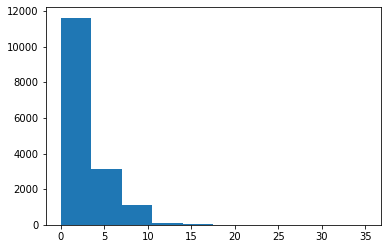

In [70]:
plt.hist(hours_1)

As can be seen in the histogram of values for 'hours', which are rounded down, most of the values are in the 0-10 hour range. The rule of thumb for outliers is removing those values with z-scores of more than 3. 

In [71]:
checkin['hours'].max()

35.0

In [72]:
checkin = checkin[(np.abs(stats.zscore(checkin['hours'])) < 3)]

In [73]:
print(checkin)

          user            timestamp  hours      project
0         arya  2018-09-24 12:06:00    3.0   project-32
1         arya  2018-10-03 13:35:00    2.0   project-32
2         arya  2018-10-16 00:00:00    2.0   project-32
3         arya  2018-11-13 10:49:00    7.0   project-32
4         arya  2018-10-17 15:23:00    2.5   project-25
...        ...                  ...    ...          ...
16028  ygritte  2018-07-09 00:00:00    1.0    workshops
16029  ygritte  2018-07-10 14:48:03    6.0       design
16030  ygritte  2018-07-10 14:48:03    1.0  opsandadmin
16031  ygritte  2018-05-23 12:30:00    3.5      website
16032  ygritte  2018-05-24 09:54:00    3.5   project-11

[15851 rows x 4 columns]


In [74]:
checkin['hours'].max()

9.75

In [75]:
checkin.to_csv("datasets/dailycheckins_cleaned.csv")